## 2. Getting slightly more advanced


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import keras
from keras.models import Model, Sequential
from keras.layers import *
from keras.optimizers import Adam
import keras.backend as K

import tensorflow as tf
import numpy as np

Using TensorFlow backend.


In [2]:
print(keras.__version__)
print(tf.__version__)

2.0.5
1.2.0


### Lets import our dataset

In [3]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

n_classes = 10
# convert class vectors to binary One Hot Encoded
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)
y_train[0]

(60000, 784) train samples
(10000, 784) test samples


array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

### Setting up our Network Hyper Parameters

In [5]:
# Training Parameters for basic MNIST
learning_rate = 0.1 
training_epochs = 10
batch_size = 100

# Network Parameters
n_input = 784 # MNIST data input (img shape: 28*28 flattened to be 784)
n_hidden_1 = 384 # 1st layer number of neurons
n_hidden_2 = 100 # 2nd layer number of neurons
n_hidden_3 = 100 # 2nd layer number of neurons
n_classes = 10 # MNIST classes for prediction(digits 0-9 )

### This time we are going to make a functional model instead of a sequential model

In [6]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Dense_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Dense_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Dense_3")(x)
output = Dense(n_classes, activation='softmax', name = "Outputlayer")(x)


In [9]:
# This creates a model that includes our input, 3 dense hidden layers, output layer
model = Model(Inp, output)

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
Dense_1 (Dense)              (None, 384)               301440    
_________________________________________________________________
Dense_2 (Dense)              (None, 100)               38500     
_________________________________________________________________
Dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
Outputlayer (Dense)          (None, 10)                1010      
Total params: 351,050
Trainable params: 351,050
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [22]:
K.set_value(model.optimizer.lr, learning_rate)

In [23]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s - loss: 0.3786 - acc: 0.8885 - val_loss: 0.1743 - val_acc: 0.9464

In [24]:
def plot_train(hist):
    h = hist.history
    if 'acc' in h:
        meas='acc'
        loc='lower right'
    else:
        meas='loss'
        loc='upper right'
    plt.plot(hist.history[meas])
    plt.plot(hist.history['val_'+meas])
    plt.title('model '+meas)
    plt.ylabel(meas)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc=loc)
    

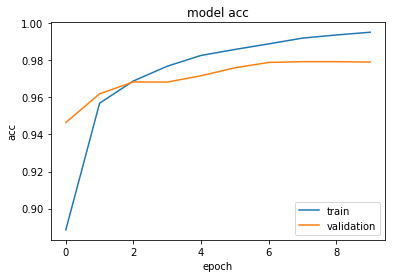

In [25]:
plot_train(history)

Now lets add dropput

Dropout(0.3) = randomly dropout 30% of the units each pass through

In [26]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Dense_1")(Inp)
x = Dropout(0.3)(x)
x = Dense(n_hidden_2, activation='relu', name = "Dense_2")(x)
x = Dropout(0.3)(x)
x = Dense(n_hidden_3, activation='relu', name = "Dense_3")(x)
output = Dense(n_classes, activation='softmax', name = "Outputlayer")(x)


In [27]:
model = Model(Inp, output)

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
Dense_1 (Dense)              (None, 384)               301440    
_________________________________________________________________
dropout_1 (Dropout)          (None, 384)               0         
_________________________________________________________________
Dense_2 (Dense)              (None, 100)               38500     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
Dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
Outputlayer (Dense)          (None, 10)                1010      
Total para

In [29]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [18]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s - loss: 1.4286 - acc: 0.5521 - val_loss: 0.5452 - val_acc: 0.8636

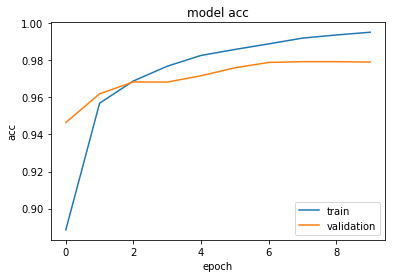

In [31]:
plot_train(history)

In [32]:
model.predict(x_test[0:4])

array([[ 0.09224422,  0.09254911,  0.1021954 ,  0.10602774,  0.10935499,
         0.07620662,  0.1200789 ,  0.10022387,  0.08999468,  0.11112446],
       [ 0.07477865,  0.09199917,  0.09759255,  0.11483364,  0.11323057,
         0.07661297,  0.15321349,  0.09027048,  0.07512119,  0.11234732],
       [ 0.08868657,  0.0958219 ,  0.09324026,  0.10583124,  0.10599873,
         0.08648831,  0.12197474,  0.09618966,  0.09233136,  0.11343729],
       [ 0.0683507 ,  0.09382661,  0.08243654,  0.09439924,  0.08646309,
         0.08199504,  0.15080637,  0.13240144,  0.08793533,  0.12138568]], dtype=float32)

In [33]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.31477623672
Test accuracy: 0.1104


### Build a netowork with at least 7 layers and uses dropout

In [37]:
# Training Parameters for basic MNIST
learning_rate = 0.1 
training_epochs = 10
batch_size = 100

# Network Parameters
n_input = 784 # MNIST data input (img shape: 28*28 flattened to be 784)
n_hidden_1 = 384 # 1st layer number of neurons
n_hidden_2 = 300 # 2nd layer number of neurons
n_hidden_3 = 275 # 2nd layer number of neurons

n_hidden_4 = 250 # 1st layer number of neurons
n_hidden_5 = 200 # 2nd layer number of neurons

n_hidden_6 = 150 # 2nd layer number of neurons
n_hidden_7 = 100 # 2nd layer number of neurons

n_classes = 10 # MNIST classes for prediction(digits 0-9 )

In [38]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Dense_1")(Inp)
x = Dropout(0.1)(x)
x = Dense(n_hidden_2, activation='relu', name = "Dense_2")(x)
x = Dropout(0.2)(x)
x = Dense(n_hidden_3, activation='relu', name = "Dense_3")(x)

x = Dropout(0.25)(x)
x = Dense(n_hidden_3, activation='relu', name = "Dense_4")(x)

x = Dropout(0.31)(x)
x = Dense(n_hidden_3, activation='relu', name = "Dense_5")(x)

x = Dropout(0.32)(x)
x = Dense(n_hidden_3, activation='relu', name = "Dense_6")(x)

x = Dropout(0.33)(x)
x = Dense(n_hidden_3, activation='relu', name = "Dense_7")(x)



output = Dense(n_classes, activation='softmax', name = "Outputlayer")(x)

In [39]:
model = Model(Inp, output)

In [40]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 784)               0         
_________________________________________________________________
Dense_1 (Dense)              (None, 384)               301440    
_________________________________________________________________
dropout_9 (Dropout)          (None, 384)               0         
_________________________________________________________________
Dense_2 (Dense)              (None, 300)               115500    
_________________________________________________________________
dropout_10 (Dropout)         (None, 300)               0         
_________________________________________________________________
Dense_3 (Dense)              (None, 275)               82775     
_________________________________________________________________
dropout_11 (Dropout)         (None, 275)               0         
__________

In [41]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [42]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s - loss: 2.2494 - acc: 0.1617 - val_loss: 1.9807 - val_acc: 0.4388

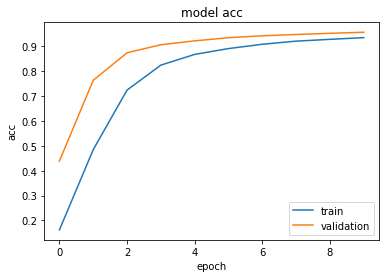

In [43]:
plot_train(history)

In [44]:
model.predict(x_test[0:4])

array([[  2.92567311e-05,   3.35726918e-06,   1.45608326e-04,
          6.60845981e-05,   6.69707276e-07,   1.16649687e-07,
          4.99931541e-10,   9.99618411e-01,   1.49848887e-07,
          1.36333561e-04],
       [  2.03184347e-04,   4.12271220e-05,   9.98363197e-01,
          9.77514545e-04,   4.69859333e-06,   1.80628706e-06,
          2.38801294e-04,   6.43712556e-05,   1.04732477e-04,
          4.34862045e-07],
       [  5.17959488e-05,   9.97962952e-01,   4.75615641e-04,
          7.05456841e-05,   4.43085373e-05,   7.34144123e-05,
          1.79791750e-05,   8.01016635e-04,   4.49617888e-04,
          5.27351913e-05],
       [  9.99812424e-01,   2.24128591e-08,   5.24947645e-05,
          2.70885698e-06,   3.99482900e-07,   6.40838625e-05,
          3.59150290e-05,   3.17314989e-05,   5.41158691e-08,
          1.31686733e-07]], dtype=float32)

In [45]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.147738257215
Test accuracy: 0.9567
